<a href="https://colab.research.google.com/github/AI-ClassWork/Tensorflow_Fundamentals/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but we will simplify it: Predicting a numerical variable based on some other combination of variables(predicting a number)

In [1]:
# import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.0


##Create some data to view and fit


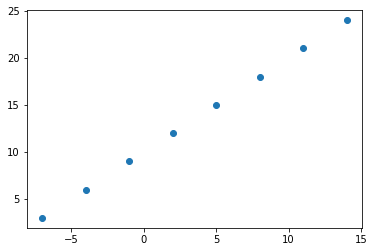

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Creare labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize it
plt.scatter(X,y);

In [3]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and output shapes

In [4]:
#Create a demo tensor for our housing price prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0],y[0]

(-7.0, 3.0)

In [6]:
X[1],y[1]

(-4.0, 6.0)

In [7]:
input_shape=X[0].shape
output_shape=y[0].shape

input_shape,output_shape

((), ())

In [8]:
#Turn our numpy arrays to tensors
X=tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
input_shape=X[0].shape
output_shape=y[0].shape

input_shape,output_shape

(TensorShape([]), TensorShape([]))

##Steps in modelling with tensorflow
1. Create a model- define the input and output layers, as well as hidden layerrs of a  deep learning model
2. Compiling a model-define the loss function(the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns it's learning) and evaluation metrics(what can we use to interpret the performance of our model)
3. Fitting a model- letting the model try to find patterns between X&y(features and labels)

#Optionally, the first layer can receive an `input_shape` argument (Creating a model using a sequential API)
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8,input_shape=(16,)))

#Afterwards we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))



In [10]:
#Create a random seed
tf.random.set_seed(42)

# 1. Create a model using a sequential API
model=tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,#mean absolute error(mae)
              optimizer=tf.keras.optimizers.SGD(),#sgd is short for stochastic gradient descent
              metrics=["mae"]
              )
#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 566ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [11]:
#Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
#Try and make a prediction with our trained model
y_pred=model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

##Improving our Model

We can improve our model by altering the steps we took to create the model.

1. Creating a model - Here we might addd  more layers, increase number of hidden layers within each of the hidden layers, change the activation function of each layer.
2. Compiling model- here we might change the optimization function or perhaps the **learning rate** of the optimization function
3. Fitiing a model-here we might fit a model for more epochs(leave it training for longer) or on more data(give the model more examples to learn from)


In [13]:
#Let's rebuild our model (Increase no.of epochs)
# 1. Create a model using a sequential API
model=tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,#mean absolute error(mae)
              optimizer=tf.keras.optimizers.SGD(),#sgd is short for stochastic gradient descent
              metrics=["mae"]
              )
#3. Fit the model(This time we'll train for longer)
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 300ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0

In [14]:
# remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
#Let's see if our model's prediction has improved
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [16]:
#Let's rebuild our model (Increase no.of epochs plus increase no.of layers)
# 1. Create a model using a sequential API
model=tf.keras.Sequential([
      tf.keras.layers.Dense(50, activation=None),
      tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss="mae",#mean absolute error(mae)
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"]
              )
#3. Fit the model(This time we'll train for longer)
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 413ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - loss: 7.4673 -

In [17]:
#Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [18]:
#See if model improved
model.predict([17.0])

array([[26.58353]], dtype=float32)

#Let's rebuild our model (Increase no.of epochs and change API)
# 1. Create a model using a sequential API
model=tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,#mean absolute error(mae)
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"]
              )
#3. Fit the model(This time we'll train for longer)
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

##Evaluating a model

In practice, a typical workflow one goes through when building neural networks is:

Build a model -> fit it ->evaluate it -> tweak it ->fit it ->evaluate it-> tweak it->fit it->evaluate it etc...

When it comes to evaluation there are 3 words to memorize

visualize, visualize, visualize!!!

It's a good idea to visualize:
* The data: What are we working with?
* The model itself: What does the model look like?
* The training of a model- how does a model perform while it learns
* The predictions of a model- how do the predictions look like against what the value should have been

In [19]:
#Make a bigger dataset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
#Make labels for the dataset
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

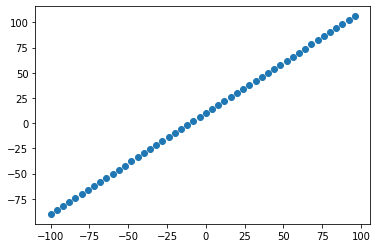

In [21]:
#Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets...

* The training set- The model learns from this data, which is typically 70-80% of the total data available
* Validation set- the model gets tuned on this set, which is 10-15% of data available
* Test set: Model gets evaluated on this data to see what is learned: 10-15% of the total data available



In [22]:
#Check the lengty of how mwny samples we have
len(X)

50

In [23]:
# Split the data into train and test sets
X_train= X[:40] # First 40 of training samples (80%)
y_train=y[:40]

X_test=X[40:] # last 10 are testing samples
y_test=y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Visualize the train and test sets.

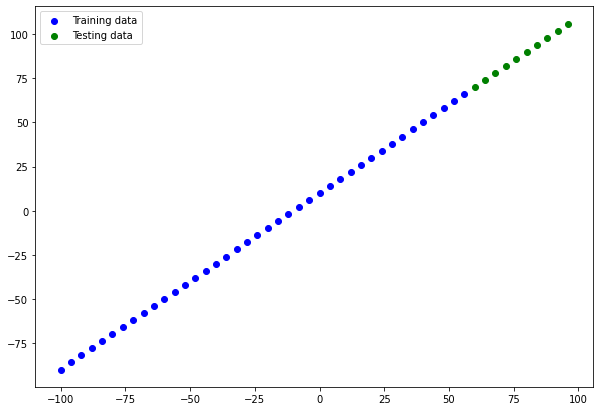

In [24]:
plt.figure(figsize=(10,7))
#Plot training data in blue
plt.scatter(X_train,y_train, c="b",label="Training data")
#Plot the test data in green
plt.scatter(X_test,y_test, c="g",label="Testing data")

#Show a legend
plt.legend();

In [25]:
# Let's have a look at how to build a neural network for our data

#1. Create a model
model=tf.keras.Sequential([
         tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile (loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"]
               )
#3. Fit the model
#model.fit(X_train,y_train,epochs=100)

###Visualize the model

In [27]:
model.summary()

ValueError: ignored

In [28]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [29]:
#Let's create a model that builds automatically by defining the input_shape argument in the first layert
tf.random.set_seed(42)
#1. Create a model
model = tf.keras.Sequential([
         tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
         tf.keras.layers.Dense(1, name="output_layer")
],name="Model_A")

#2. Compile the model(Same as above)
model.compile (loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"]
               )


In [30]:
model.summary()

Model: "Model_A"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params: Total number of parameters in the model
* Trainable params: parameters(patterns) the model can update as it trains
* Non-trainable-params:These parameters aren't updated during training ( typical when you bring in already learned patters during transfer learning)

In [31]:
# Let's fit our model to the traing data
model.fit(X_train,y_train,epochs=100, verbose=0)

In [32]:
#Get a summary of our model
model.summary()

Model: "Model_A"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


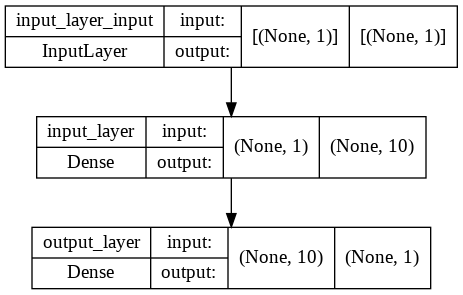

In [33]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot the against the ground truth lables.

In [34]:
# Make some predictions
y_pred=model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [35]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note: If you feel like you're going to reuse some functionalities, turn it into a function**

In [36]:
# Build a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data,train_labels, c="b", label="Training data")
 #Plot testing data in green
  plt.scatter(test_data,test_labels,c="g", label="Testing data")
 #Plot predicted values in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")
 #Show the legend
  plt.legend();


              

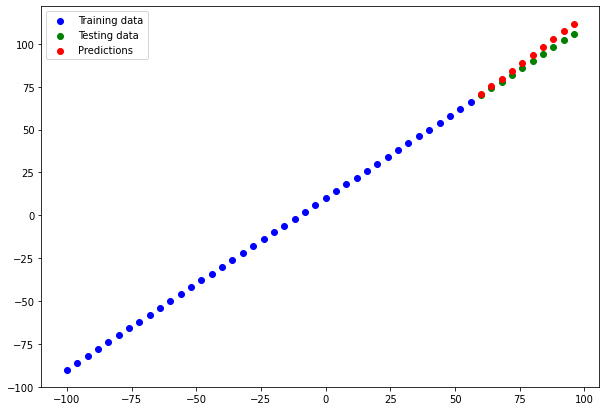

In [37]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

###Evaluating our mode's predictions with regression evaluation metrics

Depending on the problem, there wikk be different evaluation metrics to evaluate your model's performance

Two of the main metrics in regression:
* MAE- mean absolute error, "On average, how wrong is each of the model's predictions?"
* MSE- mean square error, "Square the avaerage errors" (When larger errors are more significant than smaller errors)


In [38]:
#Evaluate the model on the test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 148ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [39]:
#Calculate the mean absolute error

In [40]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [41]:
y_test


<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [42]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [43]:
#Calculate the mae
mae=tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [44]:
# Calculate the mean square error
mse=tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [45]:
#Make some functions to reuse MAE and MSE

def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred))

def mse (y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

1. Get more data- get more examples for your model to train on
2. Make your model larger (Using a more complex model- more layers or more hidden units)
3. Train for longer- More of a chance to find patterns

Let's do two modelling exeperiments
1. `Model 1`- Same as original model, 1 layer, trained for 100 epochs
2. `Model 2`- 2 Layers, trained for 100 epochs
3. `Model 3`- 2 layers, trained for 500 ephocs


**Build Model 1**

In [46]:
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [47]:
#Set random seed
tf.random.set_seed(42)
#1. Create a model
model_1=tf.keras.Sequential([
         tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile (loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"]
               )
#3. Fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

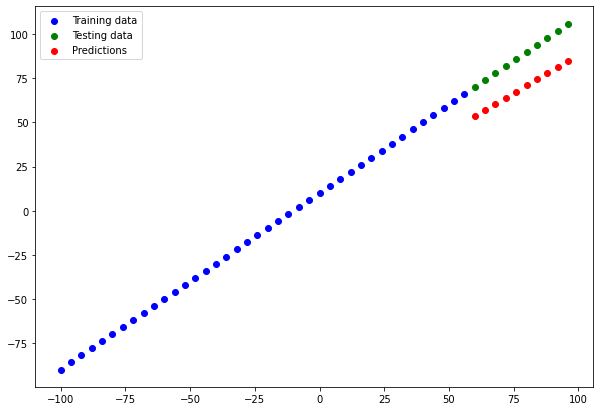

In [48]:
# Make and plot predictions for model_1
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [49]:
# Calculate the mae of model_1
mae_1=mae(y_test,y_preds_1)

#Calculate the mse of model_1
mse_1=mse(y_test,y_preds_1)

mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**model_2**

In [50]:
#Set random seed
tf.random.set_seed(42)
#1. Create a model
model_2=tf.keras.Sequential([
         tf.keras.layers.Dense(10),
         tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile (loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
#3. Fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/100
2/2 [==============================] - 0s 6ms/

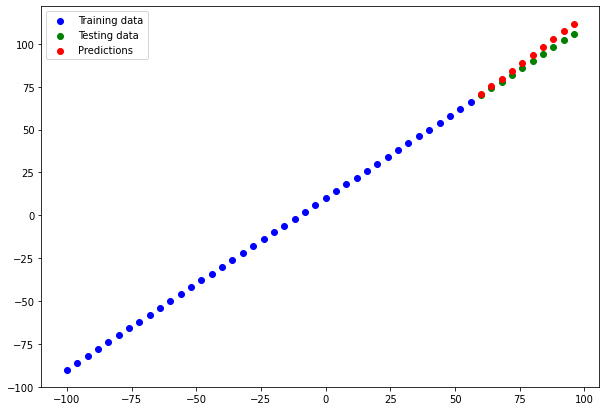

In [51]:
# Make and plot predictions of model_2
y_preds_2=model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [52]:
# Calculate the mae of 2
mae_2=mae(y_test,y_preds_2)

#Calculate the mse of model_2
mse_2=mse(y_test,y_preds_2)

mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build model_3

In [53]:
#Set random seed
tf.random.set_seed(42)
#1. Create a model
model_3=tf.keras.Sequential([
         tf.keras.layers.Dense(10),
         tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile (loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
#3. Fit the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 16ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 6ms

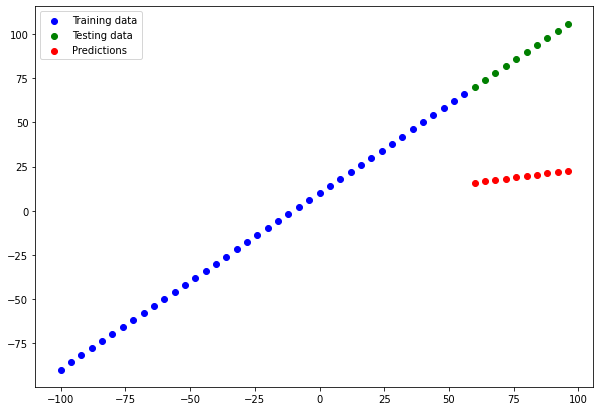

In [54]:
# Make and plot predictions of model_3
y_preds_3=model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [55]:
# Calculate the mae of 3
mae_3=mae(y_test,y_preds_3)

#Calculate the mse of model_3
mse_3=mse(y_test,y_preds_3)

mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

***Note*** You want to start with small experiments and make sure the work and increase their scale appropriately

###Comparing the results of our experiments

In [56]:
# Let's compare our mode's results using a pandas DaraFrame
import pandas as pd

model_results=[["model_1", mae_1.numpy(),mse_1.numpy()],
               ["model_2",mae_2.numpy(),mse_2.numpy()],
               ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results=pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


**Looks like model_2 performed the best**

In [57]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Tracking your experiments

Can be tedious when running lots of experiments.

You may want to look into:
* TensorBoard- a component of TensorFlow library to help track modelling experiments
* Weights&Biases- a tool for tracking all kinds of machine learning experiments

###Saving our models

Saving our models allows us to use them outside of google colab such as in a web application or a mobile app

There are two main formats we ca save our models to:

1. The SavedModel format
2. The HDF5 format

In [58]:
# Save Model using the SavedModel format
model_2.save("Best_model_saved_format")

INFO:tensorflow:Assets written to: Best_model_saved_format/assets


In [59]:
# Save model using the HDF5 format
model_2.save("Best_model_saved_format.h5")

###Loading saved models

In [64]:
#Loading in the savedModel format model
loaded_SavedModel_format=tf.keras.models.load_model("/content/Best_model_saved_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [68]:
#Compare mode_3 predictions with SavedModel format predictions
model_2_preds=model_2.predict(X_test)
loaded_SavedModel_format_preds=loaded_SavedModel_format.predict(X_test)
model_2_preds==loaded_SavedModel_format_preds


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [70]:
# Load in a model using the .h5 format
loaded_h5_model=tf.keras.models.load_model("/content/Best_model_saved_format.h5")
loaded_h5_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [71]:
#Check to see if loaded .h5 predictions match model_2
model_2_preds=model_2.predict(X_test)
loaded_h5_model_preds=loaded_h5_model.predict(X_test)
model_2_preds==loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Download a model(or any other file) from Google Colab

1. Go to the files tab and right click on the file and click download
2. Use code(See cell below)
3. Save to google drive by connecting google drive and copying it there(See 2nd cell below)

In [72]:
#Download a file from, google colab
from google.colab import files
files.download("/content/Best_model_saved_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
#Save a file from Google Colab to Google Drive(requires mounting Google Drive)
!cp /content/Best_model_saved_format.h5 /content/drive/MyDrive

##A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [76]:
#Read in the insurance dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [78]:
#Let's try on-hot encode our dataframe so it's all numbers
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [89]:
# Create X and y values(features and labels)
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]

In [90]:
#View X and y
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [92]:
#View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [93]:
#Create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [101]:
#Build a neural network (Sort of like model_2 above)
tf.random.set_seed(42)

#1.Create a model
insurance_model=tf.keras.Sequential([
         tf.keras.layers.Dense(10),
         tf.keras.layers.Dense(1)
         ])

#2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# 3. Fit the model
insurance_model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13235.9590 - mae: 13235.9590
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12311.1182 - mae: 12311.1182
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12173.6699 - mae: 12173.6699
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12099.2920 - mae: 12099.2920
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11985.4248 - mae: 11985.4248
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 11799.9395 - mae: 11799.9395
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 11476.8359 - mae: 11476.8359
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 10967.0264 - mae: 10967.0264
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 10350.2998 - mae: 10350.2998
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 9702.670

In [102]:
#Check the results of the insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8962.0615 - mae: 8962.0615


[8962.0615234375, 8962.0615234375]

In [106]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Let's try to improve the model

To try improving the model we'll run 2 experiments 
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Train for longer(200 epochs)

In [116]:
# Set random seed
tf.random.set_seed(42)

#1. create the model
insurance_model_2=tf.keras.Sequential([
            tf.keras.layers.Dense(100),
            tf.keras.layers.Dense (10),
            tf.keras.layers.Dense(1)                      
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. Fit the model
insurance_model_2.fit(tf.expand_dims(X_train,axis=1),y_train, epochs=100,verbose=1)



Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7409.0815 - mae:

In [118]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [125]:
#Second experiment
# Set random seed
tf.random.set_seed(42)

#1. create the model
insurance_model_3=tf.keras.Sequential([
            tf.keras.layers.Dense(100),
            tf.keras.layers.Dense (10),
            tf.keras.layers.Dense(1)                      
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. Fit the model
history=insurance_model_3.fit(tf.expand_dims(X_train,axis=1),y_train, epochs=300,verbose=1)


Epoch 1/300
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/300
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 7409.0815 - mae:

In [126]:
#Evaluate our third model
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3215.8608 - mae: 3215.8608


[3215.86083984375, 3215.86083984375]

Text(0.5, 0, 'epochs')

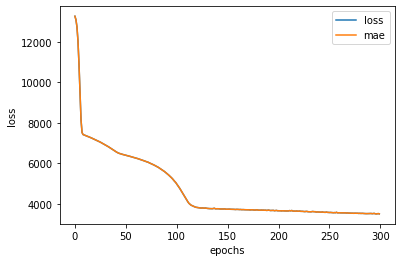

In [127]:
#Plot history (also known as a loss curve or training curve )
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Tensorflow early stopping callback- Tensorflow componenent you can add to your model to stop training once it stops improving a certain metric

### Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization. 

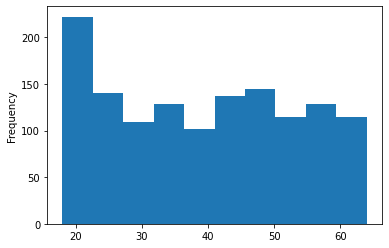

In [130]:
X["age"].plot(kind="hist")

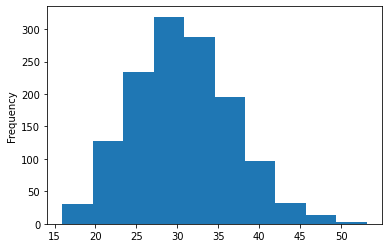

In [131]:
X["bmi"].plot(kind="hist")

In [132]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#Read in the insurance dataframe
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#To prepare our data, we can borrow a few classes from Scikit-Learn

In [135]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
#Create a column transformer
ct = make_column_transformer((MinMaxScaler(),["age","bmi","children"]), #turn all values in these columns between 0 and 1
                             (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
                             )

# Create X and Y
X= insurance.drop("charges", axis=1)
y=insurance["charges"]

# Build our train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization(MinMaxScalar) and OneHotEncoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [136]:
# What does our data look like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [137]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [138]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded. Now build a neural network model 

In [139]:
#Experiment with new forms of data
# Set random seed
tf.random.set_seed(42)

#1. create the model
insurance_model_4=tf.keras.Sequential([
            tf.keras.layers.Dense(100),
            tf.keras.layers.Dense (10),
            tf.keras.layers.Dense(1)                      
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. Fit the model
insurance_model_4.fit(tf.expand_dims(X_train_normal,axis=1),y_train, epochs=100,verbose=1)


Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11925.96

In [141]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

BEST RESULTS YET!!!!